Dataset loaded successfully!
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
R-squared Score: 0.9347068473282423


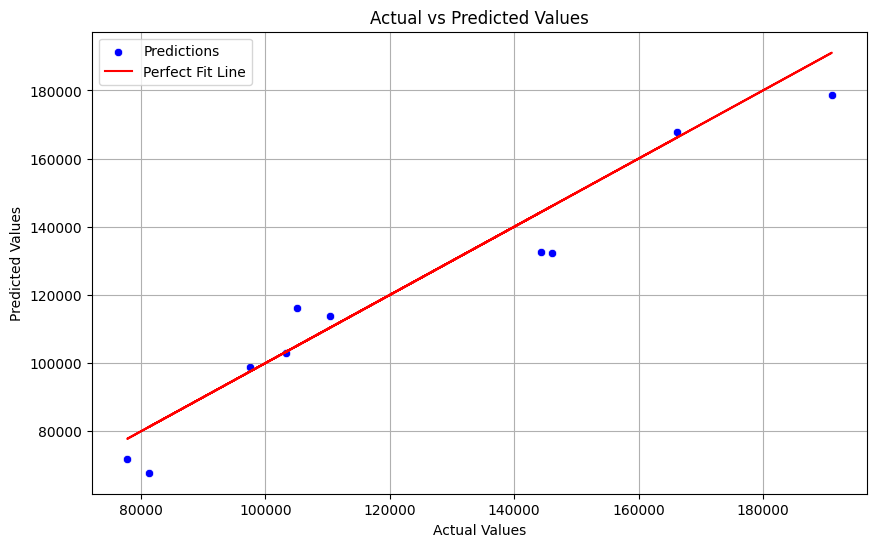

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

try:
    trail = pd.read_csv('C:\\Users\\91772\\Downloads\\50_Startups.csv')
    print("Dataset loaded successfully!")
    print(trail.head())
except FileNotFoundError:
    print("Error: The file '50_Startups.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")



# Preparing the data
x = trail.iloc[:, :-1]
y = trail.iloc[:, 4]

state = pd.get_dummies(x['State'], drop_first=True)
x = x.drop('State', axis=1)
x = pd.concat([x, state], axis=1)

# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Training the regression model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

# Making predictions
y_pred = regression.predict(x_test)

# Evaluating the model
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f"R-squared Score: {score}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Perfect Fit Line')  # Perfect fit line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
